## QCAA - Query, Calculate, Age, Analyze
### Variability Analysis

Madyson G. Barber

This notebook computes the VarX values and VarX90 ages for a given list of stars using methods outlined in [Barber & Mann (in Review)](paperlink). We calculate expected Gaia magnitude uncertainties using EDR3_Photometric_Uncertainties from [Riello et al. 2021](https://www.aanda.org/articles/aa/full_html/2021/05/aa39587-20/aa39587-20.html).

A seperate python file (analysisFunctions.py) contains all function definitions used below, as well as some additional helper functions. The sample cuts, as outlined in [Barber & Mann (in Review)](paperlink), are included in the filters function. These cuts can be manipulated, but may yield differing results as these are the cuts the calibration is tuned to. 

Function uses are detailed in the README file. 

The example below demonstrates the basic uses of **QCAA**

In [1]:
import warnings                   # there are a few warnings that occassionally pop up 
warnings.filterwarnings('ignore') # when re-calculated var values, these warnings can be ignored
                                  

from analysisFunctions import *

---
The file path should point to a csv file containing the output of FriendFinder [Tofflemire et al. (2021)](https://iopscience.iop.org/article/10.3847/1538-3881/abdf53#ajabdf53fn6), or at minimum a csv containing a columb called 'Gaia DR3' with the list of ids in the format 'Gaia DR3 < id number >'. See testFile.csv for an example format. testFile.csv is a cut version of the FriendFinder list of MELANGE 6 candidates from [Vowell et al. (2023)](http://doi.org/10.48550/arXiv.2301.09663).

In [2]:
filepath = "./testFile.csv"

Use **query** to download all the needed Gaia entries. The group size may be smaller than the input list due to stars lacking needed data from Gaia. 

In [3]:
group = query(filepath, rewrite=False)

---
Use **calculate** to find the varX90 values and uncertainties in each band. Output order: G, BP, RP

In [4]:
varG90, varG90Err, varBP90, varBP90Err, varRP90, varRP90Err = calculate(group)

print(f' varG90: {round(varG90, 3)} +/- {round(varG90Err, 3)}\n varBP90: {round(varBP90, 3)} +/- {round(varBP90Err, 3)} \n varRP90: {round(varRP90, 3)} +/- {round(varRP90Err, 3)}')


 varG90: 0.872 +/- 0.053
 varBP90: 0.78 +/- 0.07 
 varRP90: 0.893 +/- 0.06


---
Finally, **age** can convert the varX90 values into ages and uncertainties. You may specify which band you would like to use ("G", "RP", or "BP"), see just the overall age (default, "overall", takes the weighted average of the 3 bands), or see everything ("all", order: overall, G, BP, RP). 

In [12]:
combinedAge, combinedAgeErr = age(group, band = 'overall')

print(f'{round(combinedAge)} -{round(combinedAgeErr[0])}, +{round(combinedAgeErr[1])}')

---
This code also offers some diagnostic plots, which can be called through the **analyze** function.

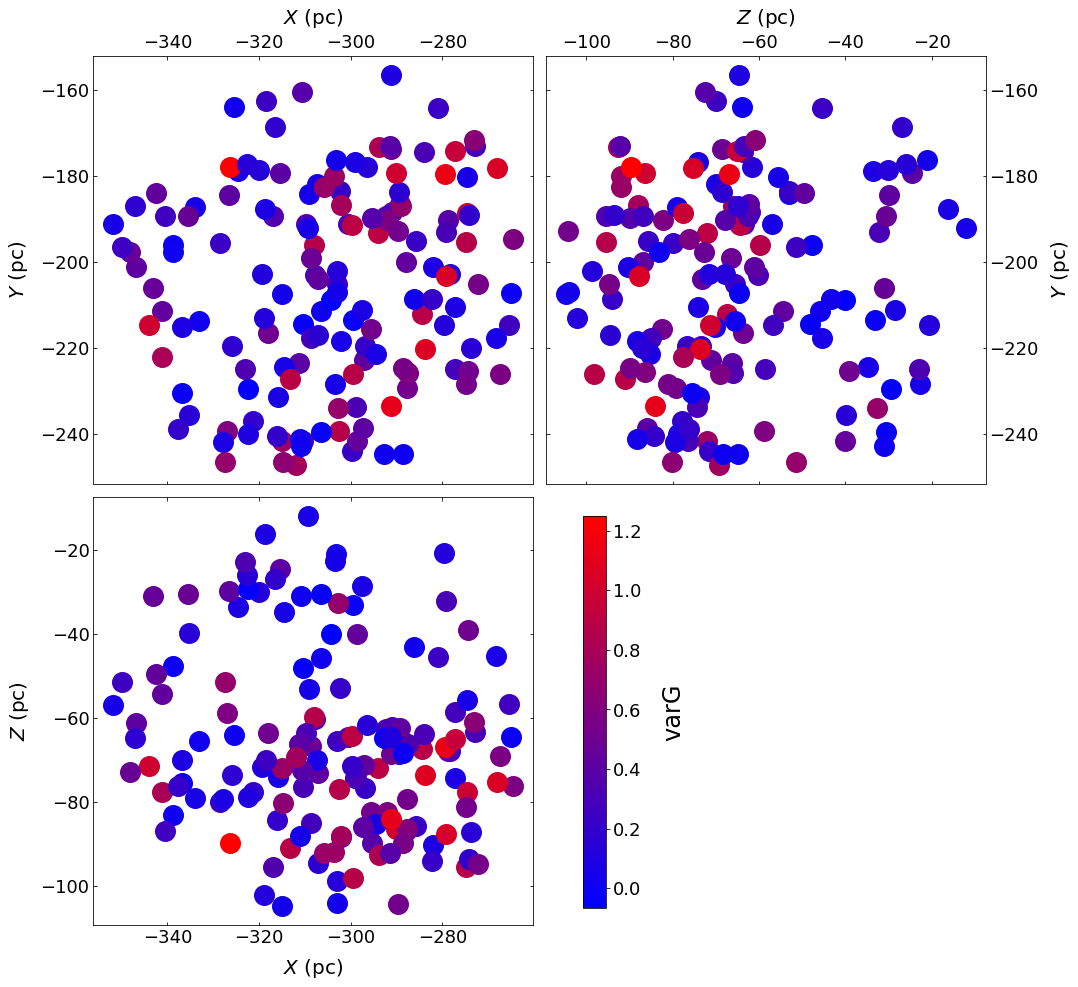

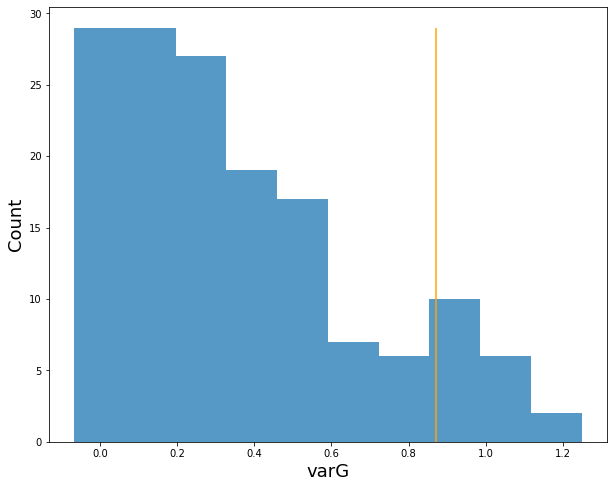

In [6]:
analyze(group, 'G')

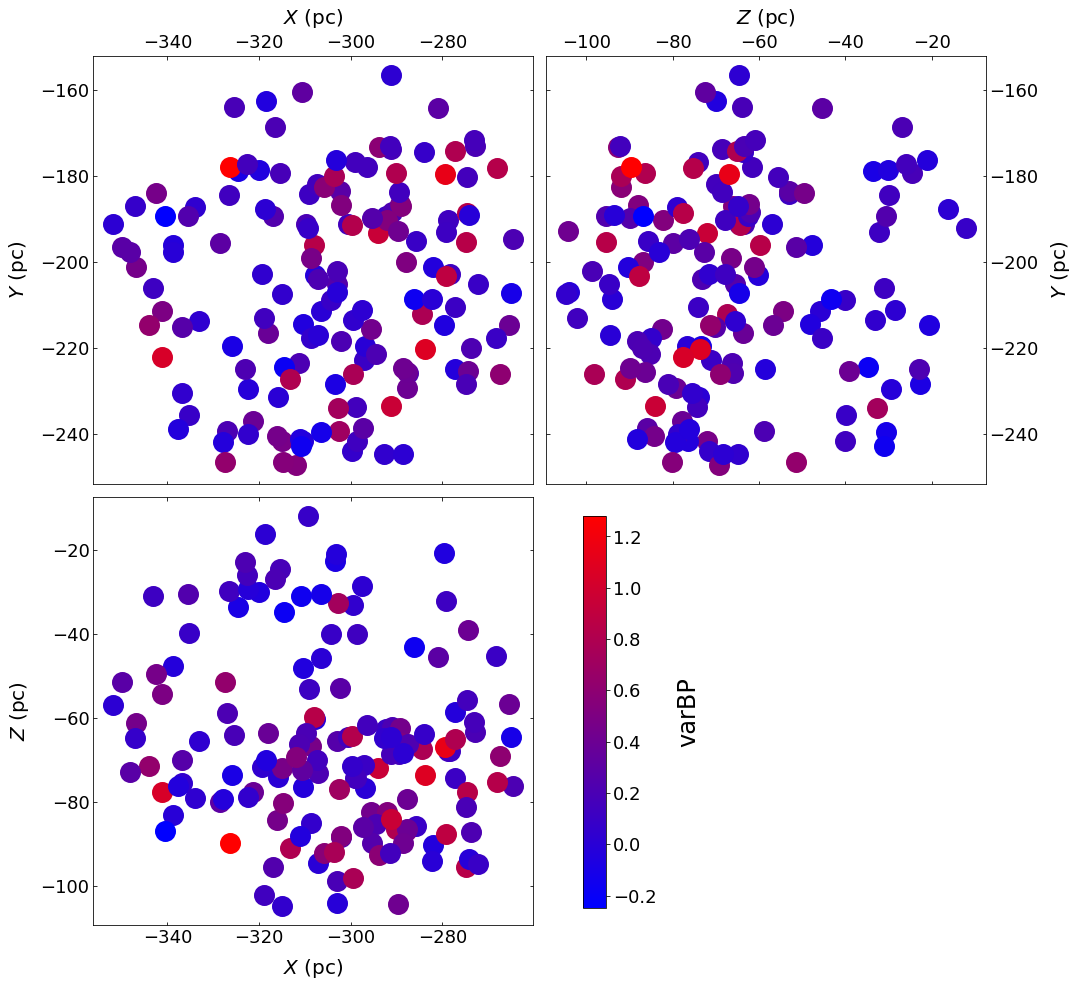

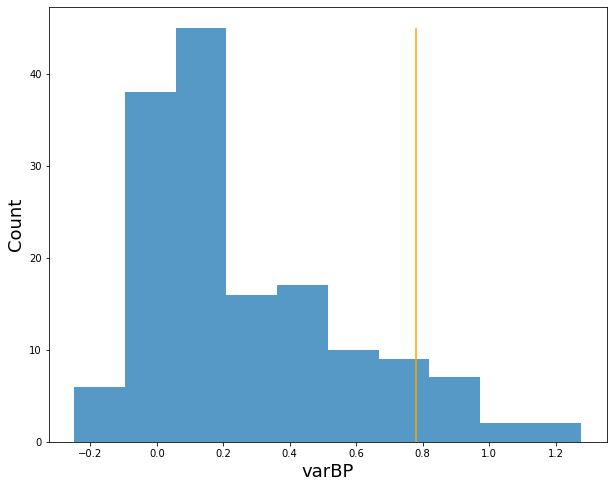

In [7]:
analyze(group, 'BP')

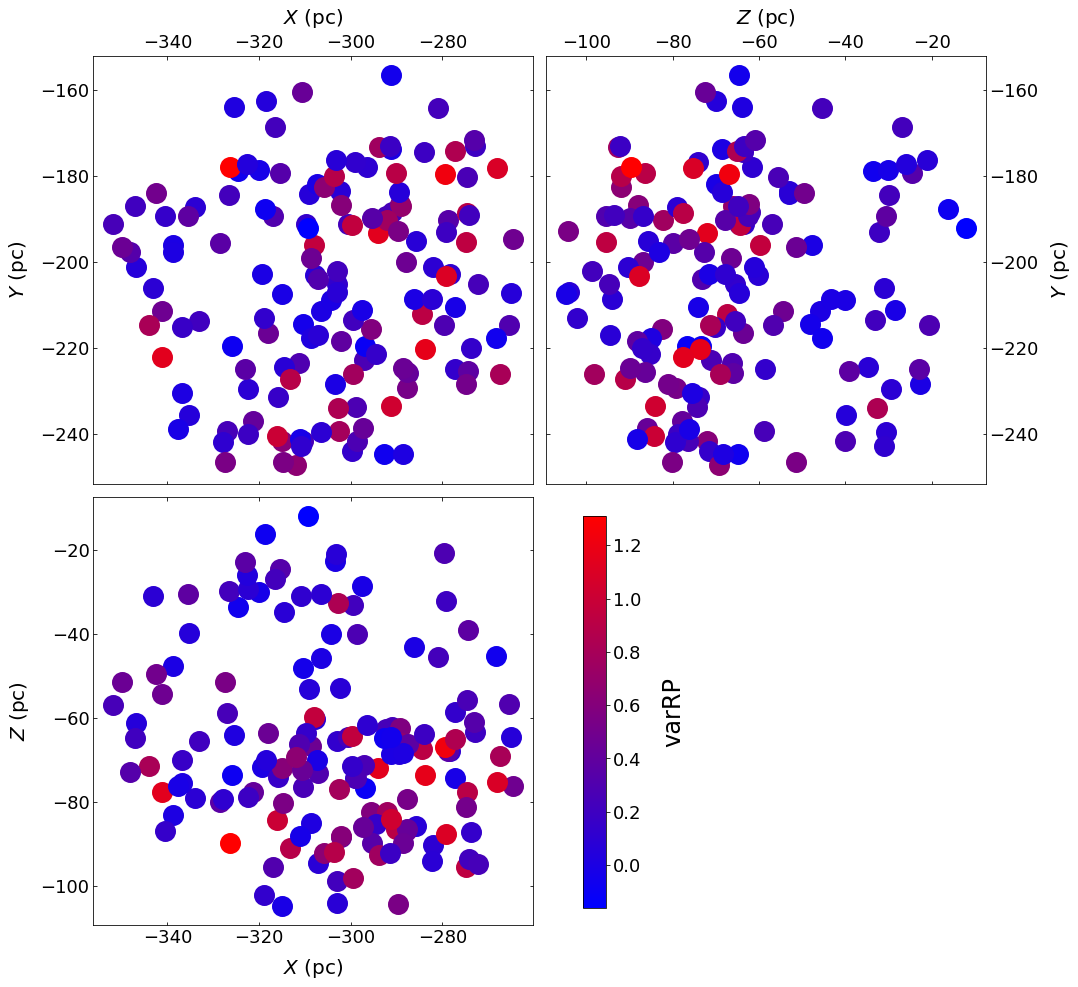

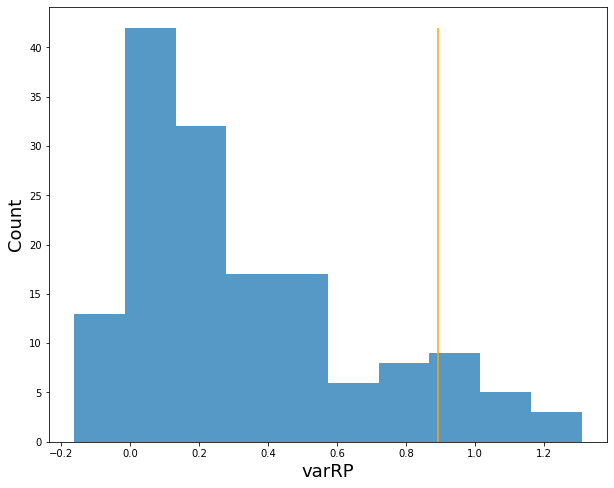

In [8]:
analyze(group, 'RP')

---
And it really is as simple as that. Please cite the use of this code by referencing [Barber & Mann (2023)](paperlink). Thank you, and happy aging!

---